<a href="https://colab.research.google.com/github/Taciana3090/FAST-MachineLearning/blob/Taciana3090%2Fmaster/%5BTaciana_Vasconcelos%5D_Aula_07_Experimentos_e_Avalia%C3%A7%C3%A3o_de_Classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster
O naufrágio do Titanic é um dos naufrágios mais famosos da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

Neste desafio de kaggle, pedimos que você construa um modelo preditivo que responda à pergunta: "que tipo de pessoa tem mais probabilidade de sobreviver?" usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

https://www.kaggle.com/c/titanic/overview 



## Objetivos de aprendizado:
Depois de fazer este Colab, você saberá como:

*   Experimentar com diferentes métricas para selecionar seu modelo de classificação
*   Avaliar o seu modelo de acordo com as métricas abordadas nas bases de treino e teste: Matriz Confusão, Precisão, Cobertura, Acurácia e F1-Score
*   Estimar os melhores parametros para um modelo de clasificação
* Criar uma solução para a competição kaggle Titanic



## Datasets

Nesta competição, você terá acesso a dois conjuntos de dados semelhantes que incluem informações do passageiro, como nome, idade, sexo, classe socioeconômica, etc. Um conjunto de dados é intitulado `train.csv` e o outro é intitulado` test.csv` .

Baixe os dados da competição deste site: [Kaggle: Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)


## Chame as declarações de importação
O seguinte codigo importa os modulos necessários

In [ ]:
#@title Load the imports

# This Python 3 environment comes with many helpful analytics libraries installed

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns  # visualization tool
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
sns.set()

[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]



## Analisis e exploração dos dados do dataset titanic
*Lembrar: Precisa carregar o titanic.zip na raiz do projeto*

In [ ]:
!unzip -n titanic.zip -d titanic

for dirname, _, filenames in os.walk('./titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Archive:  titanic.zip
./titanic/gender_submission.csv
./titanic/train.csv
./titanic/test.csv


In [ ]:
# Passo 1
# Carrega os dados do dataset titanic empregando pandas (pd)
# link: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
### COMENZAR O CODIGO AQUI ### 
train_data = pd.read_csv("/content/titanic/train.csv")# ???
### TERMINA AQUI ###

# Visualize as 15 primeiras linhas da tabela train_data
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head
### COMENZAR O CODIGO AQUI ### 
num_linhas = 15 # ???
train_data.head(num_linhas)
### TERMINA AQUI ###

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Explorando os dados de teste 
# Lembrando que os dados de teste de kaggle não possuem o atributo Survival (label para o problema de classificação)
test_data = pd.read_csv("./titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Explorano os dados de submisão para kaggle
gender_submission = pd.read_csv('./titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Descripção das caracteristicas 
---



In [ ]:
# Passo 2
# Imprime informação das features presentes no conjunto de trenamento
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info 
### COMENZAR O CODIGO AQUI ### 
train_data.info() # ???
### TERMINA AQUI ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


| Variable | Definition | Key 
|----------|-----------------------|-----------------------------------|
|survival  | Sobrevivência         |0=No, 1=Sim                        |
|pclass    | Classe de ingresso	   |1 = 1st, 2 = 2nd, 3 = 3rd          |
|sex       | Sexo                  | |
|Age       | Idade em anos         | |
|sibsp     | # de irmãos/cônjuges  | |
|parch     | # de pais/filhos      | |
|ticket    | Número do bilhete     | |
|fare      | Tarifa de passageiro	 | |
|cabin     | Número da cabine	     | |
|embarked  | Porto de embarcação   |C=Cherbourg, Q=Queenstown, S=Southampton |

## Dados faltantes (missing value)


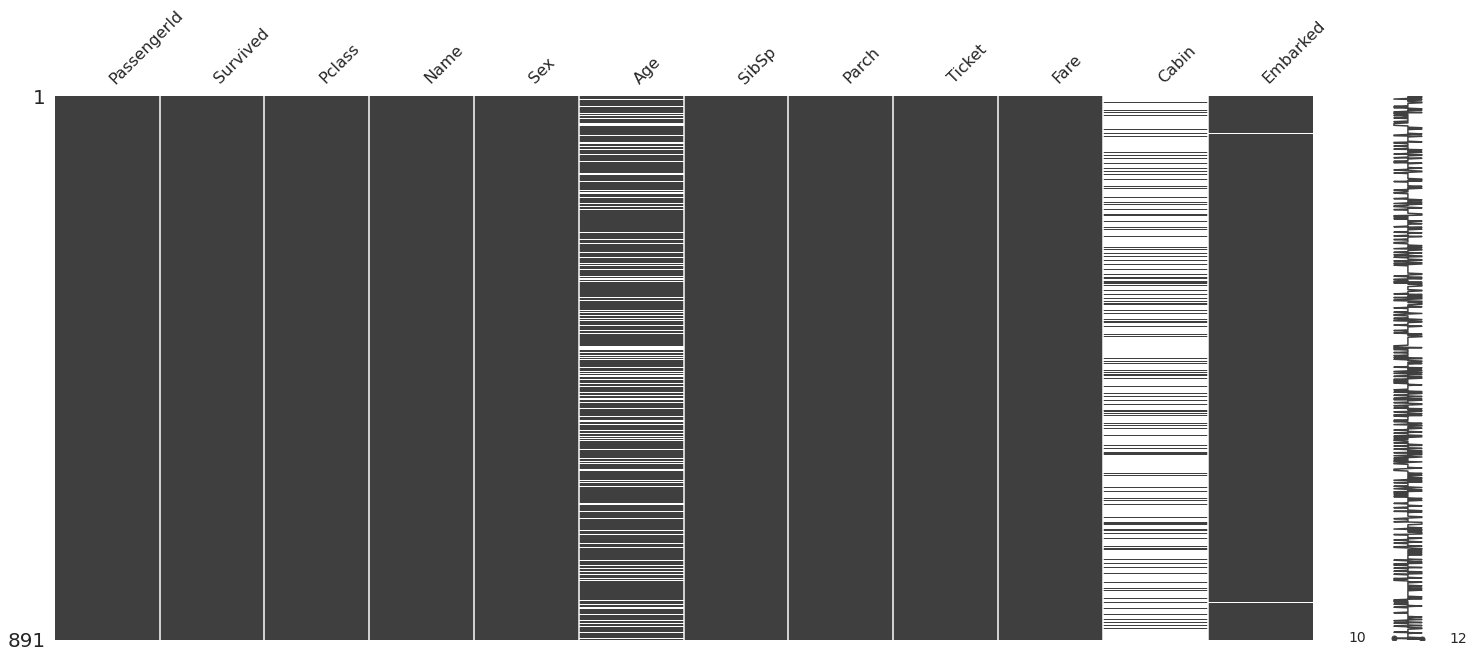

In [ ]:
# Passo 3
# Visualize os dados faltantes no conjunto de trenamento
# Para visualizar os dados faltantes ou missing value pode empregar a função matrix do pacote python missingno
# link: https://github.com/ResidentMario/missingno 
### COMENZAR O CODIGO AQUI ### 
msno.matrix(train_data) # ???
### COMENZAR O CODIGO AQUI ### 
plt.show()

## Mostramos alguns exemplos didacticos do analisis da edad e do sexo
Siéntase libre para formular novas hipóteses e validar elas no conjunto de treinamento


### Analisis da edad
Para fazer uma análise da idade foi selecionado algumas faixas etárias para entender quais destas faixas foram mais afectadas no acidente 

Formularam-se as seguintes hipóteses: 

* Qual foi a média de idade no Titanic?
* Qual foi a faixa etária mais afetada? 
* Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate?


In [ ]:
# Passo 4
# Seleccionar a feature "Age" dos dados de treinamento
train_age = train_data['Age'].copy()
train_age = train_age[~train_data['Age'].isnull()] 

# Imprimir a estadística descriptiva da idade
print(train_age.describe())

# Qual foi a média de idade no Titanic?
### COMENZAR O CODIGO AQUI ### 
age_media = train_age.mean()# ???
### TERMINA AQUI ###
print("\nA idade media do Titanic foi de: {} anos".format(age_media))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

A idade media do Titanic foi de: 29.69911764705882 anos


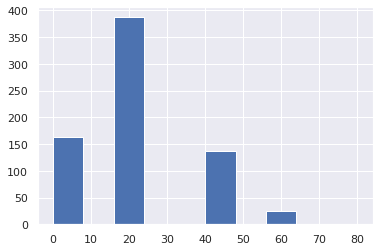

In [ ]:
# Quantification Xage
# Xage = [Xage/q] * q 
quant = 20
train_age = ((train_age/quant).astype(int)) * quant
train_age.hist()
plt.show()

In [ ]:
train_surv = train_data['Survived'].copy()
train_surv = train_surv[~train_data['Age'].isnull()]

age_surv = []
for age in train_age.sort_values(ascending=True).unique():
  age_surv.append(sum(train_surv[train_age==age]))
  print('Edad: ', age, '\t Probabilidade de sobreviver: ', sum(train_surv[train_age==age])/len(train_surv[train_age==age]) )

age_surv = pd.DataFrame( data=age_surv )[0]


Edad:  0 	 Probabilidade de sobreviver:  0.4817073170731707
Edad:  20 	 Probabilidade de sobreviver:  0.3875968992248062
Edad:  40 	 Probabilidade de sobreviver:  0.39416058394160586
Edad:  60 	 Probabilidade de sobreviver:  0.24
Edad:  80 	 Probabilidade de sobreviver:  1.0


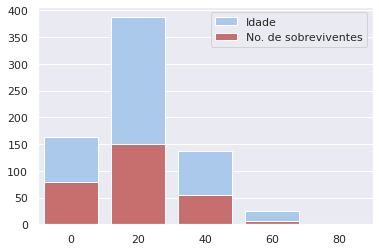

In [ ]:
age = train_age.value_counts().sort_index()
sns.set_color_codes("pastel")
g=sns.barplot(x=age.index.values, y=age.values, order=age.index, color="b", label='Idade')
sns.set_color_codes("muted")
sns.barplot(x=age.index.values, y=age_surv.values, order=age.index, color="r", label='No. de sobreviventes')
plt.legend(loc=1)
plt.show()

In [ ]:
# Passo 5
# Qual foi a faixa etária mais afetada?
# Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate?

### COMENZAR O CODIGO AQUI ### 
age_afetada = "60-80" # ???
age_meninos = "Sim" # ???
### TERMINA AQUI ###
print("A faixa etária mais afetada foi: {}".format(age_afetada))
print("Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate? {}".format(age_meninos))


A faixa etária mais afetada foi: 60-80
Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate? Sim


### Analisis do sexo
Formulou-se a seguinte hipótese:
* Quem sobreviveu mais no acidente, mulheres ou homens?


In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Probabilidade de sobreviver das mulheres:", rate_women)

Probabilidade de sobreviver das mulheres: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Probabilidade de sobreviver dos homes:", rate_men)

Probabilidade de sobreviver dos homes: 0.18890814558058924


In [ ]:
# Passo 6
# Quem sobreviveu mais no acidente, mulheres ou homens?
### COMENZAR O CODIGO AQUI ### 
sex_sobreviveu = "Mulheres com probabilidade de 74%" # ???
### TERMINA AQUI ###

print("Quem sobreviveu mais no acidente, mulheres ou homens? {}".format(sex_sobreviveu))

Quem sobreviveu mais no acidente, mulheres ou homens? Mulheres com probabilidade de 74%


## Experimentos e Avaliação de Classificadores 
Para começar a praticar a avaliação de classificadores criaremos dois classificadores tolos (dummys).  Iremos avaliar um classificador random vs um classificador que sempre retorna a mesma classe (no caso a classe mais representada no conjunto de treinamento).

In [ ]:
import random
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [ ]:

# Classificador random
# Este classificador retorna um numero aleatorio 0 ou 1
class RandomModelClassifier():
  def __init__(self):
    pass
  def fit(self, x, y):
    # Não precisa ser treinado
    pass
  def predict(self, x):
    # Passo 7 
    # Retorna um lista de número aleatório 0 ou 1 do tamanho do len(x)
    # link: https://docs.python.org/3/library/random.html 
    ### COMENZAR O CODIGO AQUI ### 
    y_hat = [random.randint(0,1) for _ in range(len(x))]# ???
    ### TERMINA AQUI ###
    return y_hat

# Classificador NotSurvived
# Este classificador retorna 0 (classe dos que não sobreviveram)
class NotSurvivedModelClassifier():
  def __init__(self):
    pass
  def fit(self, x, y):
    # Não precisa ser treinado
    pass
  def predict(self, x):
    # Passo 7
    # Retorna um lista de 0s do tamanho do len(x)
    ### COMENZAR O CODIGO AQUI ###
    y_hat =  [0 for _ in range(len(x))]# ???
    ### TERMINA AQUI ###
    return y_hat


In [ ]:

# Seleção da feature a ser estimada
# Lembrem-se que queremos saber quem sobreviveu 
y = train_data["Survived"]

# Selecção das features
# Para este exemplo foram selecionadas 4 features. Sinta-se a bondade de 
# experimentar com um número maior ou menor. Pode determinar inclusive qual 
# seriam as melhores features para resolver o problema. 
features = ["Pclass", "Sex", "SibSp", "Parch"]
X, X_test = pd.get_dummies(train_data[features]), pd.get_dummies(test_data[features])

# Divisão do conjunto em treinamento e validação
# Passo 8
# Seleccione o procentagem para o conjunto de validação
### COMENZAR O CODIGO AQUI ### 
tamanho_val = 0.33# ???
### TERMINA AQUI ###
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)


# Criação dos modelos de classificação
# Passo 9
# Cree uma instância da classe RandomModelClassifier e outra da classe 
# NotSurvivedModelClassifier
### COMENZAR O CODIGO AQUI ###
model_rand = RandomModelClassifier() # ???
model_notsurvived = NotSurvivedModelClassifier()#???
### TERMINA AQUI ###

# Treinamento dos modelos de classificação
# Passo 10
# Empregando a função fit treine os modelos de classificação
### COMENZAR O CODIGO AQUI ###
model_rand.fit(X_train, y_train)
model_notsurvived.fit(X_train, y_train)
### TERMINA AQUI ###

# Predição no conjunto de validação 
# Passo 11
# Empregando a função predict obtenha as estimativas das labels no conjunto 
# de validação
### COMENZAR O CODIGO AQUI ###
preditions_rand_val = model_rand.predict(X_val)
preditions_notsurvived_val = model_notsurvived.predict(X_val)
### TERMINA AQUI ###

# Avaliação dos resultados
# Passo 12
# Calcule o accuracy empregando a função accuracy_score do pacote 
# sklearn.metrics para os dados de validação
# link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
### COMENZAR O CODIGO AQUI ###
acc_rand = metrics.accuracy_score(y_val, preditions_rand_val)# ???
acc_notsurvived =  metrics.accuracy_score(y_val, preditions_notsurvived_val)# ???
### TERMINA AQUI ###

print('Accuracy do clasificador RandomModelClassifier é: ', acc_rand)
print('Accuracy do clasificador NotSurvivedModelClassifier é: ', acc_notsurvived)


Accuracy do clasificador RandomModelClassifier é:  0.5050847457627119
Accuracy do clasificador NotSurvivedModelClassifier é:  0.6237288135593221


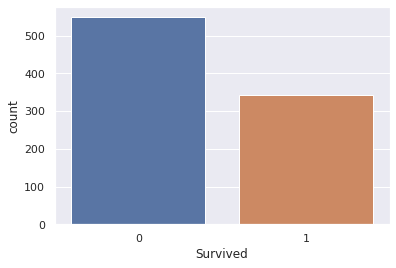

In [ ]:
sns.countplot(x="Survived", data=train_data);

## Avaliação de Classificadores empregando todas as métricas aprendidas na aula de hoje 

* **Precision** (Precisão): Número de itens corretamente identificados da classe em questão
* **Recall / Sensitivity** (Cobertura): Número de itens corretamente identificados considerando apenas a classe em questão
* **Accuracy** (Acurácia) : Qual o percentual meu classificador acerta considerando todas as classes do problema?
* **F1-Score**:  É uma média harmônica da precisão e recall


In [ ]:

# Esta função tem como objetivo calcular as métricas que vão ser empregadas para 
# avaliar os classificadores
def evaluation(y, y_hat):

  ### COMENZAR O CODIGO AQUI ###
  # Passo 13
  # Complete as funciones para cálculo das métricas empregando as funções do 
  # pacote sklearn.metrics
  # links:
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
  acc = metrics.accuracy_score(y, y_hat)# ???
  precision = metrics.precision_score(y, y_hat) # ???
  recall = metrics.recall_score(y, y_hat)
  f1_score = 2*precision*recall/(precision+recall)
  ### TERMINA AQUI ###

  return {
      'acc': acc,
      'precision': precision,
      'recall': recall,
      'f1_score': f1_score
  }


# Seleção da feature a ser estimada
# Lembrem-se que queremos saber quem sobreviveu 
y = train_data["Survived"]

# Selecção das features
# Para este exemplo foram selecionadas 4 features. Sinta-se a bondade de 
# experimentar com um número maior ou menor. Pode determinar inclusive qual 
# seriam as melhores features para resolver o problema. 
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Divisão do conjunto em treinamento e validação
# Passo 14
# Seleccione o procentagem para o conjunto de validação
### COMENZAR O CODIGO AQUI ### 
tamanho_val = 0.23# ???
### TERMINA AQUI ###
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

# Criação dos modelos de classificação
# Passo 15
# Cree uma instância da classe RandomModelClassifier e outra da classe 
# NotSurvivedModelClassifier
### COMENZAR O CODIGO AQUI ###
model_rand = RandomModelClassifier()# ???
model_notsurvived = NotSurvivedModelClassifier() #???
### TERMINA AQUI ###

# Treinamento dos modelos de classificação
# Passo 16
# Empregando a função fit treine os modelos de classificação
### COMENZAR O CODIGO AQUI ###
model_rand.fit(X_train, y_train)
model_notsurvived.fit(X_train, y_train)
### TERMINA AQUI ###

# Predição no conjunto de validação 
# Passo 17
# Empregando a função predict obtenha as estimativas das labels no conjunto 
# de validação
### COMENZAR O CODIGO AQUI ###
preditions_rand_val = model_rand.predict(X_val)
preditions_notsurvived_val = model_notsurvived.predict(X_val)
### TERMINA AQUI ###

# Avaliação dos resultados
# Passo 18
# Calcule as métricas empregando a função evaluation para os dados de validação
### COMENZAR O CODIGO AQUI ###
acc_rand =  evaluation(y_val, preditions_rand_val)['acc']# ???
acc_notsurvived = evaluation(y_val, preditions_notsurvived_val)['acc'] # ???
### TERMINA AQUI ###

print('Accuracy do clasificador RandomModelClassifier é: ', acc_rand)
print('Accuracy do clasificador NotSurvivedModelClassifier é: ', acc_notsurvived)

Accuracy do clasificador RandomModelClassifier é:  0.5024390243902439
Accuracy do clasificador NotSurvivedModelClassifier é:  0.6195121951219512


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


### Analisis do error do modelo NotSurvivedModelClassifier
Para un análisis mais detalhado vamos visualizar a matriz de confusão. Como estudo individual poderia calcular os TP, TN, FP, FN


In [ ]:
# Passo 19
# Para o cálculo da matriz de confusão  empregamos a função confusion_matrix do 
# pacote sklearn.metrics
# link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
### COMENZAR O CODIGO AQUI ###
mc = metrics.confusion_matrix(y_val, preditions_rand_val)
### TERMINA AQUI ###
print(mc)

[[60 67]
 [35 43]]


Confusion matrix, without normalization


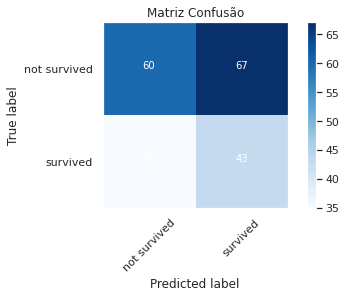

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#sns.heatmap(mc, cbar=False, annot=True, cmap="Blues", fmt="d")
plot_confusion_matrix(mc, classes=['not survived', 'survived'], title='Matriz Confusão', normalize=False)
plt.grid(False)
plt.show()

## Seleção de parametros

Da mesma forma que conseguimos comparar dois métodos de classificação, podemos também comparar um várias versões do mesmo métodos obtidas com diferentes parâmetros (diferentes modelos do mesmo método). Poderíamos também selecionar os melhores subconjuntos de features e métodos de pré-processamento. 

Neste exercicios vamos a seleccionar o melhor k para o método k-NN 


In [ ]:
import random
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier

# Esta função tem como objetivo calcular as métricas que vão ser empregadas para 
# avaliar os classificadores
def evaluation(y, y_hat):

  ### COMENZAR O CODIGO AQUI ###
  # Passo 20
  # Complete as funciones para cálculo das métricas empregando as funções do 
  # pacote sklearn.metrics
  # links:
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
  acc =  metrics.accuracy_score(y, y_hat)# ???
  precision =  metrics.precision_score(y, y_hat)# ???
  recall =  metrics.recall_score(y, y_hat)# ???
  f1_score = 2*precision*recall/(precision+recall) # ???
  ### TERMINA AQUI ###

  return {
      'acc': acc,
      'precision': precision,
      'recall': recall,
      'f1_score': f1_score
  }


# Seleção da feature a ser estimada
# Lembrem-se que queremos saber quem sobreviveu 
y = train_data["Survived"]

# Selecção das features
# Para este exemplo foram selecionadas 4 features. Sinta-se a bondade de 
# experimentar com um número maior ou menor. Pode determinar inclusive qual 
# seriam as melhores features para resolver o problema. 
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Divisão do conjunto em treinamento e validação
# Passo 21
# Seleccione o procentagem para o conjunto de validação
### COMENZAR O CODIGO AQUI ### 
tamanho_val = 0.23# ???
### TERMINA AQUI ###
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

# Selecção de parâmetros
# Passo 22
# Seleciona um subconjunto de parâmetros k para avaliar o classificador KNN
# Para este exercício recomendamos k \in [1,3,5,7,9]
### COMENZAR O CODIGO AQUI ### 
neighbors = [1,3,5,7,9]# ???
### TERMINA AQUI ###

evaluations = []
for k in neighbors:

  # Estimação dos modelos
  model_knn = KNeighborsClassifier(n_neighbors = k)

  # Treinamento
  model_knn.fit(X_train, y_train)

  # Predição
  preditions_knn_val = model_knn.predict(X_val)

  # Avaliação
  eval_knn = evaluation(y_val, preditions_knn_val)

  # Save
  evaluations.append(eval_knn)

  print('Knn metrics: k=',k, 'values: ', eval_knn)

  

Knn metrics: k= 1 values:  {'acc': 0.5365853658536586, 'precision': 0.4260869565217391, 'recall': 0.6282051282051282, 'f1_score': 0.5077720207253885}
Knn metrics: k= 3 values:  {'acc': 0.7804878048780488, 'precision': 0.746268656716418, 'recall': 0.6410256410256411, 'f1_score': 0.6896551724137931}
Knn metrics: k= 5 values:  {'acc': 0.7902439024390244, 'precision': 0.7777777777777778, 'recall': 0.6282051282051282, 'f1_score': 0.6950354609929079}
Knn metrics: k= 7 values:  {'acc': 0.7902439024390244, 'precision': 0.8723404255319149, 'recall': 0.5256410256410257, 'f1_score': 0.6560000000000001}
Knn metrics: k= 9 values:  {'acc': 0.7902439024390244, 'precision': 0.8888888888888888, 'recall': 0.5128205128205128, 'f1_score': 0.6504065040650406}


In [ ]:
df = pd.DataFrame(evaluations, index=neighbors)
df

,acc,precision,recall,f1_score
1,0.536585,0.426087,0.628205,0.507772
3,0.780488,0.746269,0.641026,0.689655
5,0.790244,0.777778,0.628205,0.695035
7,0.790244,0.872340,0.525641,0.656000
9,0.790244,0.888889,0.512821,0.650407


### Escolhe o melhor parâmetro e gera um modelo

In [ ]:
# Escolhe o melhor parâmetro
### COMENZAR O CODIGO AQUI ###  
k= 7# ???
### TERMINA AQUI ###

model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### Submeter teu melhor resultado
Apresentar seu resultado na plataforma kaggle é muito fácil, você pode gerar um arquivo .csv e submeter no kaggle. Esperamos que você continue trabalhando para melhorar seu resultado no leaderboard e compartilhe com todos nós. Ficaremos muito feliz :D!!! 

In [ ]:
# Predição no conjunto de test
predictions = model_knn.predict(X_test)

# Submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
